In [4]:

import sys
module_path = "/root/dacon"
sys.path.append(module_path)
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
class GradLayer(nn.Module):
    def __init__(self):
        super(GradLayer, self).__init__()
        kernel_v = [[0, -1, 0], [0, 0, 0], [0, 1, 0]]
        kernel_h = [[0, 0, 0], [-1, 0, 1], [0, 0, 0]]
        kernel_h = torch.FloatTensor(kernel_h).unsqueeze(0).unsqueeze(0)
        kernel_v = torch.FloatTensor(kernel_v).unsqueeze(0).unsqueeze(0)
        self.weight_h = nn.Parameter(data=kernel_h, requires_grad=False)
        self.weight_v = nn.Parameter(data=kernel_v, requires_grad=False)

    def get_gray(self, x):
        """
        Convert image to its gray one.
        """
        gray_coeffs = [65.738, 129.057, 25.064]
        convert = x.new_tensor(gray_coeffs).view(1, 3, 1, 1) / 256
        x_gray = x.mul(convert).sum(dim=1)
        return x_gray.unsqueeze(1)

    def forward(self, x):
        # x_list = []
        # for i in range(x.shape[1]):
        #     x_i = x[:, i]
        #     x_i_v = F.conv2d(x_i.unsqueeze(1), self.weight_v, padding=1)
        #     x_i_h = F.conv2d(x_i.unsqueeze(1), self.weight_h, padding=1)
        #     x_i = torch.sqrt(torch.pow(x_i_v, 2) + torch.pow(x_i_h, 2) + 1e-6)
        #     x_list.append(x_i)

        # x = torch.cat(x_list, dim=1)
        if x.shape[1] == 3:
            x = self.get_gray(x)

        x_v = F.conv2d(x, self.weight_v, padding=1)
        x_h = F.conv2d(x, self.weight_h, padding=1)
        x = torch.sqrt(torch.pow(x_v, 2) + torch.pow(x_h, 2) + 1e-6)

        return x

torch.Size([1, 3, 224, 224])


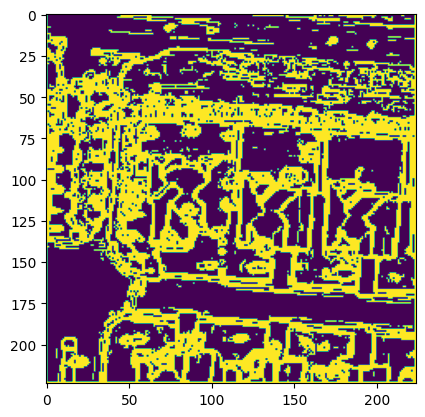

In [15]:
origin_image = cv2.imread('/root/dacon/test_file/TEST_00000.png')
# print(image)
plt.imshow(origin_image)
edge_detector = GradLayer()

image = torch.Tensor(origin_image) / 255
image = image.permute(2,0,1).unsqueeze(0)
print(image.shape)
output = edge_detector(image)
plt.imshow(output.squeeze()>0.05)

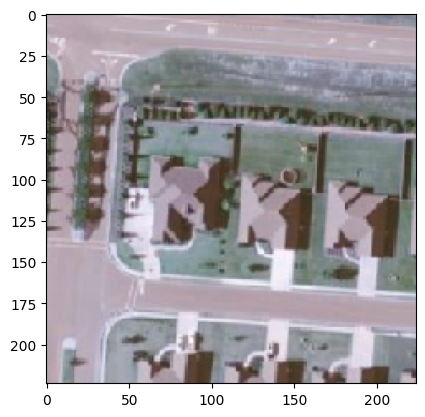

In [11]:
plt.imshow(origin_image)